In [1]:
#Control
import json
import os
import sys
import glob
import subprocess

#Ploting
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as tick
rcParams['text.usetex'] = False
rcParams['lines.linewidth'] = 0.5
rcParams['font.size'] = 16

# Processing
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Import own modules
from time_series_data import time_series_data_c
from time_series_plotter import time_series_plotter_c


## Read the data

In [2]:
files = sorted(glob.glob("*interpolated.txt*"))
for i in range(0,len(files)):
    print("File "+repr(i) +" is: "+ files[i].strip())

data = []
for i in range(0,len(files)):
    dat = np.loadtxt(files[i].strip())
    data.append(dat)

File 0 is: 00001-rbc_RA1e8_nelv21k_lx8_interpolated.txt
File 1 is: 00002-rbc_RA1e9_nelv21k_lx8_interpolated.txt
File 2 is: 00004-rbc_RA1e11_nelv21k_lx8_interpolated.txt
File 3 is: 00005-rbc_RA1e8_nelv46k_lx8_interpolated.txt
File 4 is: 00006-rbc_RA1e9_nelv46k_lx8_interpolated.txt
File 5 is: 00007-rbc_RA1e10_nelv46k_lx8_interpolated.txt
File 6 is: 00008-rbc_RA1e11_nelv46k_lx8_interpolated.txt
File 7 is: 00009-rbc_RA1e8_nelv100k_lx8_interpolated.txt
File 8 is: 00010-rbc_RA1e9_nelv100k_lx8_interpolated.txt
File 9 is: 00011-rbc_RA1e10_nelv100k_lx8_interpolated.txt
File 10 is: 00012-rbc_RA1e11_nelv100k_lx8_interpolated.txt
File 11 is: 00013-rbc_RA1e8_nelv2m_lx3_ar1_interpolated.txt


## Initialize the relevant objects

In [11]:
i = 0
time_series =[]
ts_dict = {}


for dat in data:
    ts = time_series_data_c(dat)
    time_series.append(ts)

    # Check if this rayleigh number is already in the dictionary
    key = ts_dict.get(ts.Ra[0])
    if key is None: ts_dict[ts.Ra[0]] = [] 
    ts_dict[ts.Ra[0]].append(ts)
    

ts_plt = time_series_plotter_c()



## Plot all the time series independently

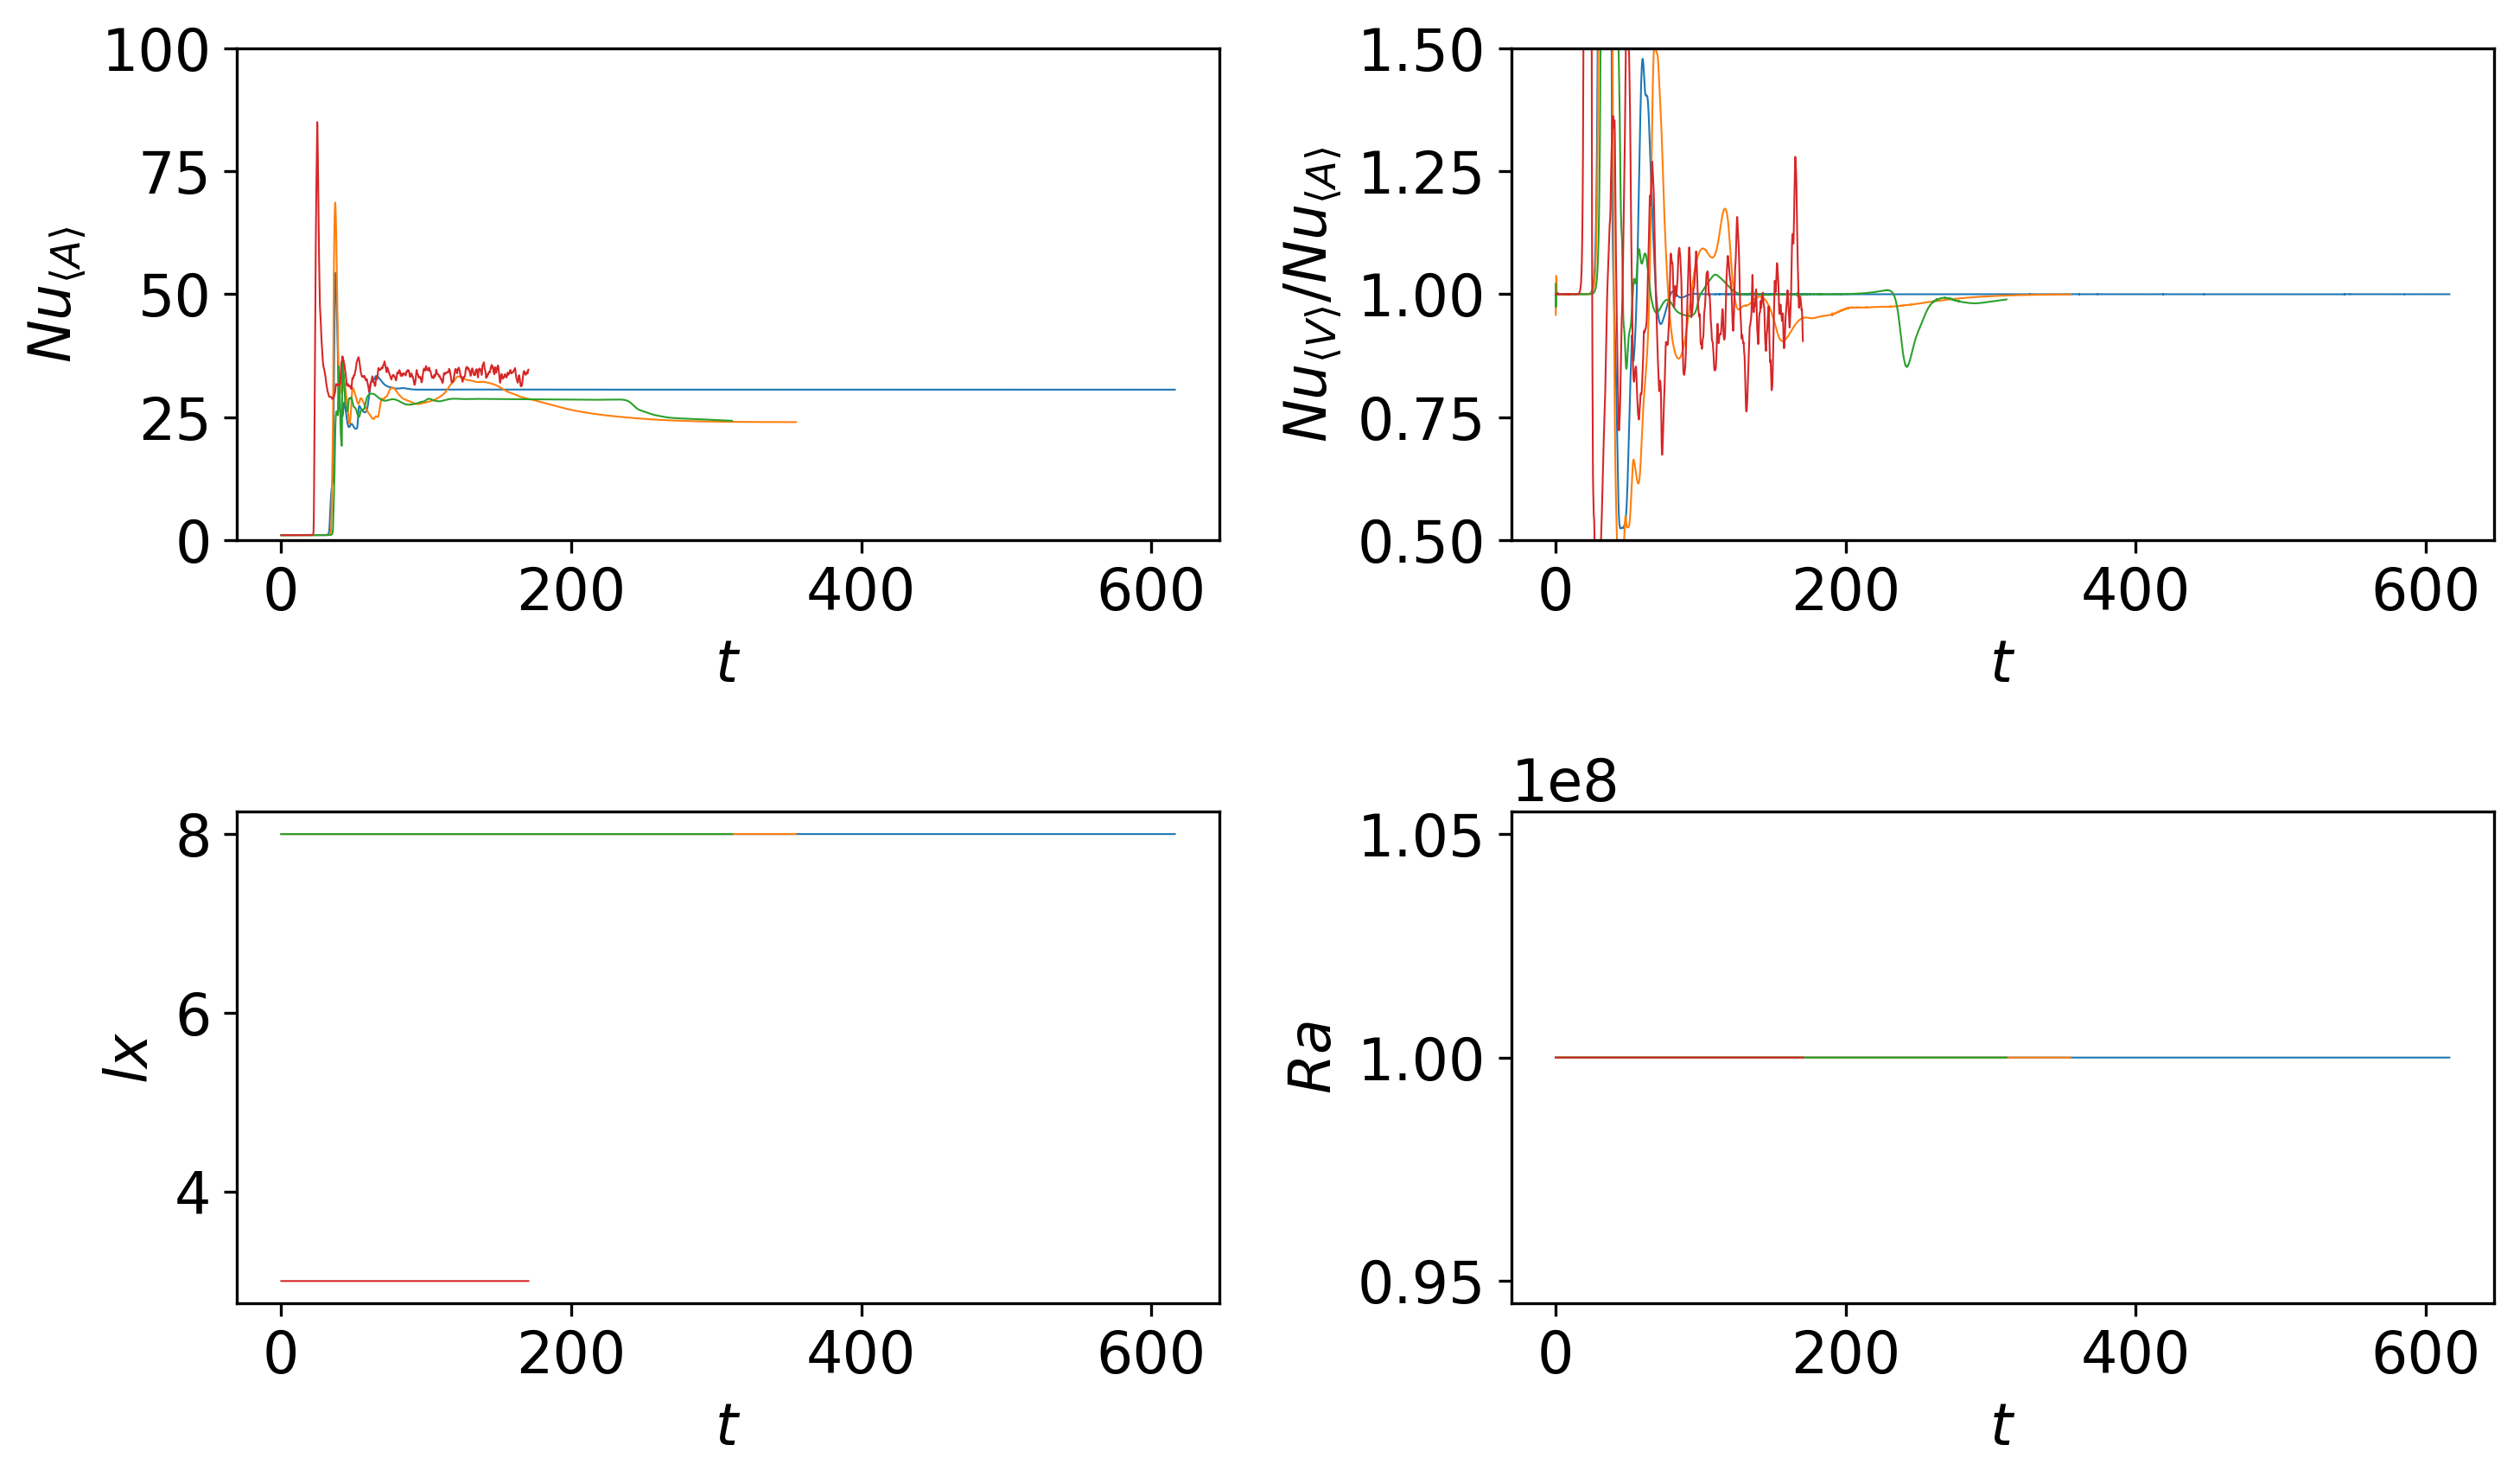

In [31]:
which_ra = 1e8

fig, ax = plt.subplots(2, 2,figsize=(10, 6), dpi=300)
for ts in ts_dict[which_ra]:
    ax[0,0].plot(ts.t, ts.nu_a)
    #ax[0,0].plot(ts.t, ts.nu_v)
    ax[0,0].set_xlabel(r'$t$')
    ax[0,0].set_ylabel(r'$Nu_{\langle A \rangle}$')
    #ax[0,0].set_xlim(50,600)
    ax[0,0].set_ylim(0,100)

        
    ax[0,1].plot(ts.t, ts.nu_v/ts.nu_a,)
    ax[0,1].set_xlabel(r'$t$')
    ax[0,1].set_ylabel(r'$Nu_{\langle V \rangle}/Nu_{\langle A \rangle}$')
    ax[0,1].set_ylim(0.5,1.5)

    ax[1,0].plot(ts.t, ts.lx)
    ax[1,0].set_xlabel(r'$t$')
    ax[1,0].set_ylabel(r'$lx$')
        
    ax[1,1].plot(ts.t, ts.Ra,)
    ax[1,1].set_xlabel(r'$t$')
    ax[1,1].set_ylabel(r'$Ra$')
    
    #ts_plt.plot_time_series(ts)    

plt.tight_layout()
plt.savefig("nu_timeseries.pdf", format="pdf", bbox_inches="tight")
plt.show()
